# dendrogram

In [1]:
import numpy as np

X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

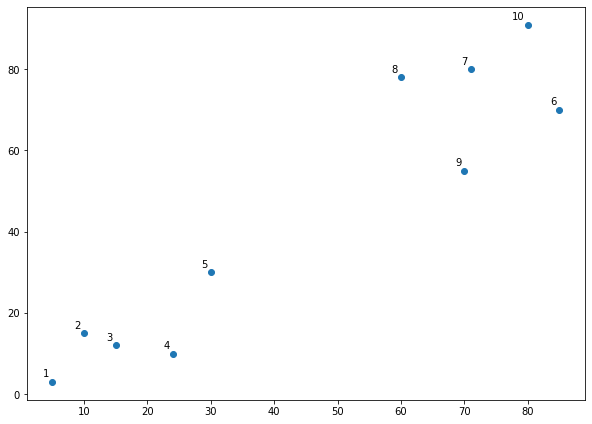

In [2]:
import matplotlib.pyplot as plt

labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

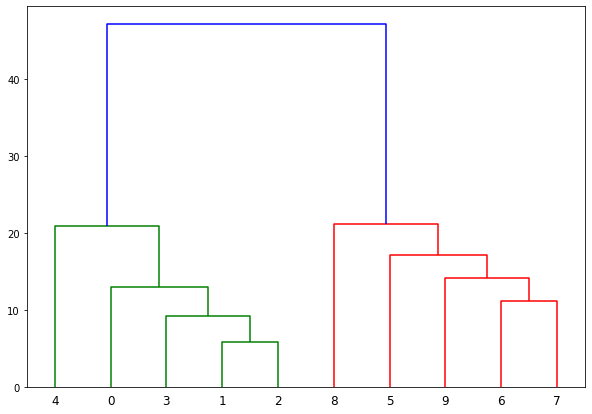

In [13]:
# method -> 'single' , 'complete' , 'average' , 'centroid' , 'weighted' , 'median' , 'ward'

linked = linkage(X, method='single', metric='euclidean')

labelList = range(1, len(X) + 1)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

# Hierarchical Clustering via Scikit-Learn

In [48]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

In [60]:
X = np.random.randint(1, 20, size=(50, 2))

In [64]:
number_of_clusters = 4
metric = 'euclidean'
method = 'single'

In [50]:
from sklearn.cluster import AgglomerativeClustering

In [65]:
# affinity -> “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, “precomputed”
# linkage -> ‘ward’, ‘complete’, ‘average’, ‘single’

cluster = AgglomerativeClustering(n_clusters=number_of_clusters, affinity=metric, linkage=method)
cluster.fit_predict(X)

array([0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [66]:
print(cluster.labels_)

[0 0 0 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


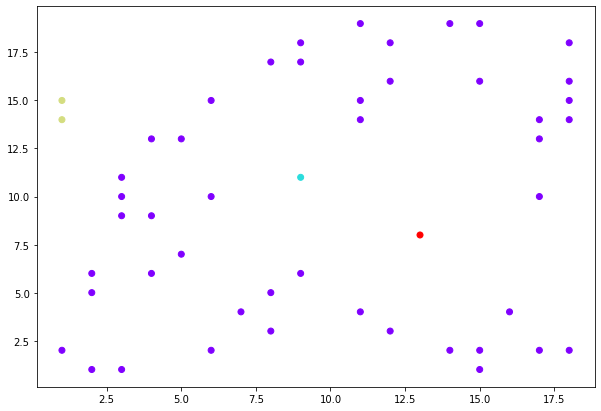

In [68]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')

# with dendogram

In [24]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

In [69]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


In [70]:
number_of_clusters = 3
metric = 'euclidean'
method = 'average'

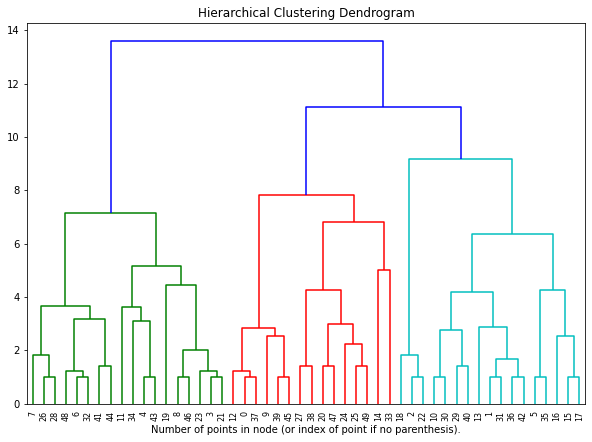

In [74]:

# if we want to compute the full tree
'''
# setting distance_threshold=0 ensures we compute the full tree.
# distance_threshold -> The linkage distance threshold above which, clusters will not be merged.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
'''
# affinity -> “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, “precomputed”
# linkage -> ‘ward’, ‘complete’, ‘average’, ‘single’

model = AgglomerativeClustering(n_clusters=number_of_clusters, 
                                affinity=metric, 
                                linkage=method, 
                                compute_distances=True)

model = model.fit(X)

plt.figure(figsize=(10, 7))
plt.title("Hierarchical Clustering Dendrogram")

# plot the top p levels of the dendrogram
# truncate_mode -> 'level' No more than p levels of the dendrogram tree are displayed.
plot_dendrogram(model, truncate_mode="level", p=10)

plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [75]:
model.labels_

array([2, 0, 0, 1, 1, 0, 1, 1, 1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 1, 2, 1,
       0, 1, 2, 2, 1, 2, 1, 0, 0, 0, 1, 2, 1, 0, 0, 2, 2, 2, 0, 1, 0, 1,
       1, 2, 1, 2, 1, 2])

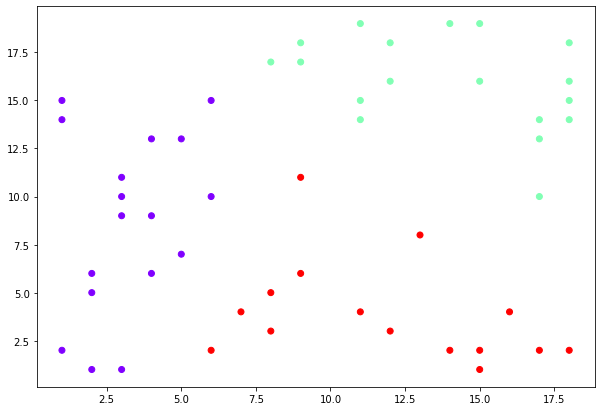

In [76]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0],X[:,1], c=model.labels_, cmap='rainbow')